<a href="https://colab.research.google.com/github/NiyazovIlia/Python-Data-Science/blob/lesson-8/GB_lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

boston = load_boston()
data = boston['data']
feature_names = boston["feature_names"]
target = boston['target']

In [2]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaler)

print('До:\t{}'.format(X_train_scaler.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


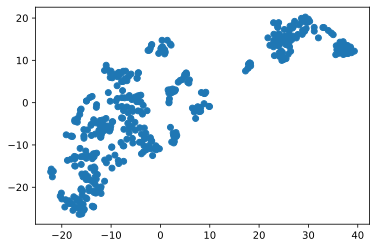

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


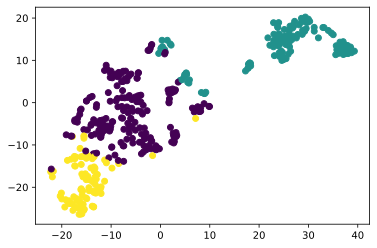

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaler)


plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [9]:
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())

Первый кластер:  price    24.958115
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    27.788372
dtype: float64


In [10]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.42166020942408367
Второй кластер: 10.797028425196853
Третий кластер: 0.07356558139534886


**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


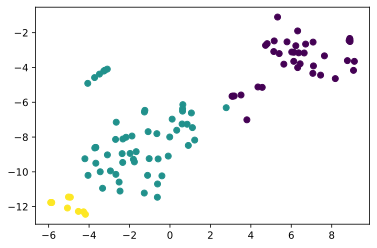

In [11]:
X_test_tsne = tsne.fit_transform(X_test_scaler)
labels_test = model.fit_predict(X_test_scaler)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [12]:
print('Первый кластер: ', y_test[labels_test == 0].mean())
print('Второй кластер:', y_test[labels_test == 1].mean())
print('Третий кластер:', y_test[labels_test == 2].mean())

Первый кластер:  price    16.710526
dtype: float64
Второй кластер: price    22.690909
dtype: float64
Третий кластер: price    34.311111
dtype: float64


In [13]:
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test== 2].mean())

Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334


**Задание 4**
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.


**Что-то очень странно у меня получилось в этом задании, скорее всего где-то ошибка**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
y_pred = lr.predict(X_test_scaler)
r2_score(y_pred,y_test)

0.6333247469014343

In [15]:
lr.fit(X_train_scaler.loc[labels_train==0], y_train.loc[labels_train==0])
y_pred_0 = lr.predict(X_test_scaler.loc[labels_test==0])
r2_score(y_pred_0, y_test.loc[labels_test==0])

-1.3662377220184383

In [16]:
lr.fit(X_train_scaler.loc[labels_train==1], y_train.loc[labels_train==1])
y_pred_1 = lr.predict(X_test_scaler.loc[labels_test==1])
r2_score(y_pred_1, y_test.loc[labels_test==1])

-7.23638576996632

In [17]:
lr.fit(X_train_scaler.loc[labels_train==2], y_train.loc[labels_train==2])
y_pred_2 = lr.predict(X_test_scaler.loc[labels_test==2])
r2_score(y_pred_2, y_test.loc[labels_test==2])

0.8686926999658073

**Задание 5**

Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные и тестовые.

Масштабируйте данные.

Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.

С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.

Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.

Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.

Сделайте вывод, какие модели лучше себя показывают на этой задаче.


In [18]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y_wine = pd.DataFrame(wine['target'], columns=['price'])

In [19]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size = 0.25, random_state = 42)

In [20]:
#масштабируем данные, дальше используем только эти данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_wine_scale = scaler.fit_transform(X_train_wine)
X_train_wine_scale = pd.DataFrame(X_train_wine_scale, columns=wine['feature_names'])

X_test_wine_scale = scaler.fit_transform(X_test_wine)
X_test_wine_scale = pd.DataFrame(X_test_wine_scale, columns=wine['feature_names'])

In [21]:
# понижение размерности данных для визуализации графики!!!
tsne_wine = TSNE(n_components=2, learning_rate=250, random_state=50)
X_train_wine_tsne = tsne_wine.fit_transform(X_train_wine_scale)
X_test_wine_tsne = tsne_wine.fit_transform(X_test_wine_scale)

print('До:\t{}'.format(X_train_wine_scale.shape))
print('После:\t{}'.format(X_train_wine_tsne.shape))

До:	(133, 13)
После:	(133, 2)


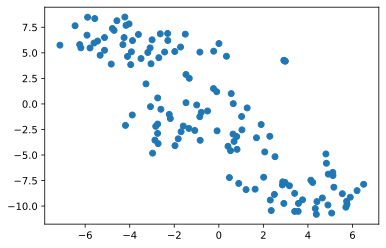

In [22]:
plt.scatter(X_train_wine_tsne[:, 0], X_train_wine_tsne[:, 1])

plt.show()

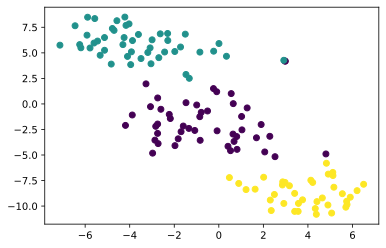

In [23]:
from sklearn.cluster import KMeans

model_km_wine = KMeans(n_clusters=3)
labels_wine_train_km = model_km_wine.fit_predict(X_train_wine_scale)
labels_wine_test_km = model_km_wine.fit_predict(X_test_wine_scale)

plt.scatter(X_train_wine_tsne[:, 0], X_train_wine_tsne[:, 1], c=labels_wine_train_km)
plt.show()

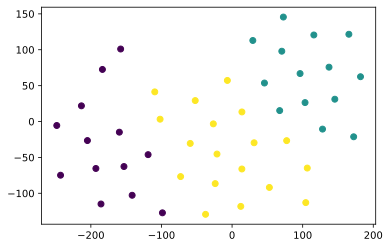

In [24]:
plt.scatter(X_test_wine_tsne[:, 0], X_test_wine_tsne[:, 1], c=labels_wine_test_km)
plt.show()

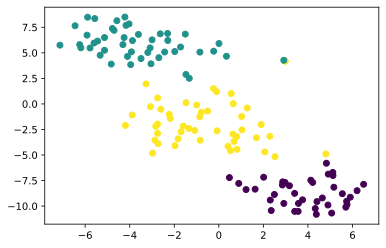

In [25]:
from sklearn.cluster import AgglomerativeClustering

model_ac_wine = AgglomerativeClustering(n_clusters=3)
labels_wine_train_ac = model_km_wine.fit_predict(X_train_wine_scale)
labels_wine_test_ac = model_km_wine.fit_predict(X_test_wine_scale)

plt.scatter(X_train_wine_tsne[:, 0], X_train_wine_tsne[:, 1], c=labels_wine_train_ac)
plt.show()

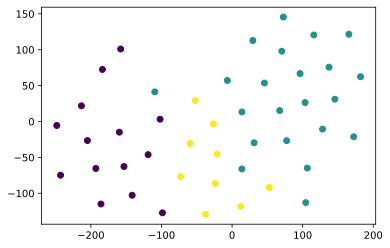

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_wine_scale, labels_wine_train_ac)

test_labels = knn.predict(X_test_wine_scale)

plt.scatter(X_test_wine_tsne[:, 0], X_test_wine_tsne[:, 1], c=test_labels)
plt.show()

**Как видно из тестовых данных, KMeans по моему мнению сработало лучше чем AgglomerativeClustering**

**Задание 6**

Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.

Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.


In [27]:
from sklearn.datasets import fetch_olivetti_faces
oliver_faces = fetch_olivetti_faces()
X_oliver = pd.DataFrame(oliver_faces['data'])
y_oliver = pd.DataFrame(oliver_faces['target'])

In [28]:
X_train_oliver, X_test_oliver, y_train_oliver, y_test_oliver = train_test_split(X_oliver, y_oliver, test_size = 0.25, random_state = 100)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_oliver_scaled = pd.DataFrame(scaler.fit_transform(X_train_oliver))
X_test_oliver_scaled = pd.DataFrame(scaler.transform(X_test_oliver))

In [30]:
# без PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train_oliver_scaled, y_train_oliver)

y_pred = lr.predict(X_test_oliver_scaled)

print(accuracy_score(y_test_oliver, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# С PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

X_train_oliver_pca = pca.fit_transform(X_train_oliver_scaled)
X_test_oliver_pca = pca.transform(X_test_oliver_scaled)

In [32]:
lr.fit(X_train_oliver_pca, y_train_oliver)
y_pred_pca = lr.predict(X_test_oliver_pca)
print(accuracy_score(y_test_oliver, y_pred_pca))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Оба метода без PCA и с PCA получили значение 0,95. Что довольно хорошо, но как мне кажется какое-то различие должно быть между ними, поэтому скорее всего я допустил ошибку**